# IBM Developer Skills Network

In [ ]:
# Link of other images can be found at 1.1
# New image link
# 'https://github.com/sonpn82/Introduction-to-computer-vision-and-image-processing/blob/master/cat.png?raw=true'

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Copying Images

<function matplotlib.pyplot.show(close=None, block=None)>

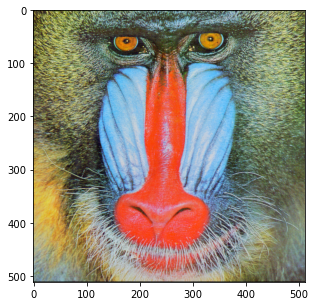

In [2]:
baboon = np.array(Image.open('baboon.png'))
plt.figure(figsize=(5, 5))
plt.imshow(baboon)
plt.show

In [3]:
# if we do not use copy, it refers to same image
A = baboon
id(A) == id(baboon) # memory location

True

In [4]:
B = baboon.copy()
id(B) == id(baboon) # B refers to other memory location

False

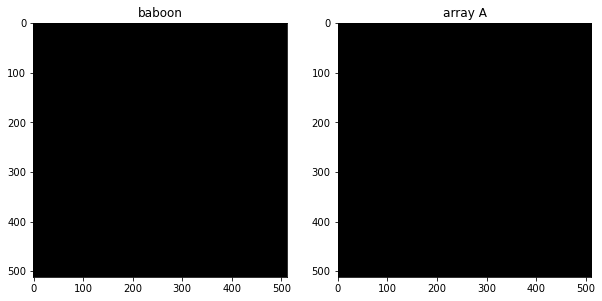

In [5]:
baboon[:,:,] = 0

# A will also be changed
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(A)
plt.title("array A")
plt.show()

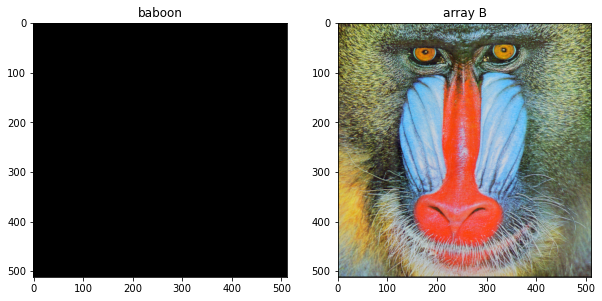

In [6]:
# B is not changed
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(B)
plt.title("array B")
plt.show()

# Flipping Images

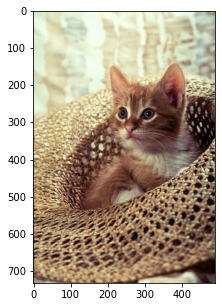

In [8]:
image = Image.open('cat.png')
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.show()

In [9]:
# Cast it to an array
array = np.array(image)
width, height, C = array.shape
print('width, height, C', width, height, C)

width, height, C 733 490 3


In [10]:
# Flip the image vertially using array method
array_flip = np.zeros((width, height, C), dtype=np.uint8)

for i, row in enumerate(array):
    array_flip[width - 1 - i, :, :] = row

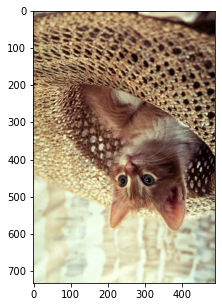

In [11]:
plt.figure(figsize=(5, 5))
plt.imshow(array_flip)
plt.show()

## Flip using ImageOps module

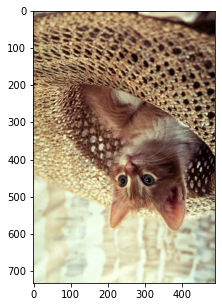

In [12]:
from PIL import ImageOps
im_flip = ImageOps.flip(image)
plt.figure(figsize=(5, 5))
plt.imshow(im_flip)
plt.show()

## Mirror image

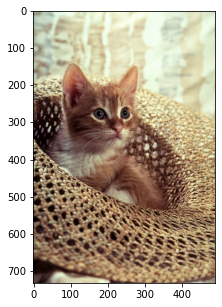

In [13]:
im_mirror = ImageOps.mirror(image)
plt.figure(figsize=(5, 5))
plt.imshow(im_mirror)
plt.show()

In [14]:
# Image module has built-in attribute the describe type of flip
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE, 
        "TRANSVERSE": Image.TRANSVERSE}

In [15]:
flip['FLIP_LEFT_RIGHT'] # value is just integer

0

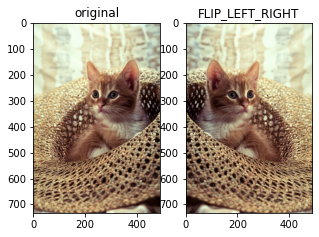

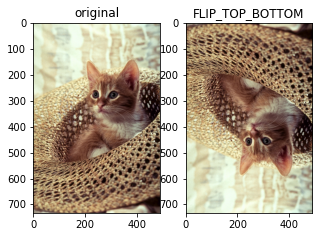

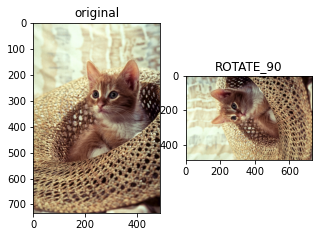

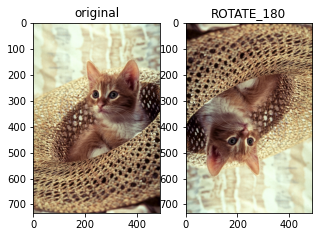

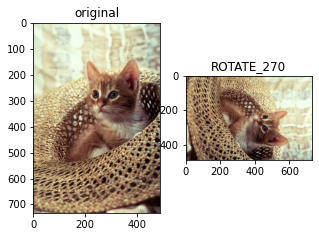

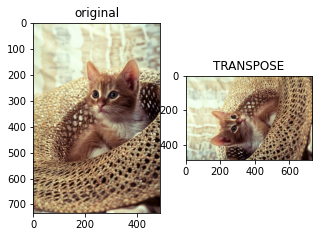

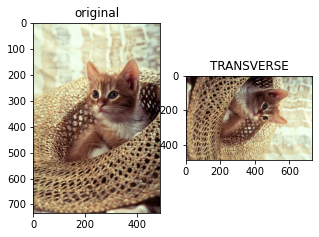

In [16]:
# Plot each output using different parameter values:
for key, values in flip.items():
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('original')
    plt.subplot(1,2,2)
    plt.imshow(image.transpose(values))
    plt.title(key)
    plt.show()

# Cropping an Image

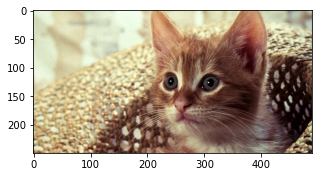

In [17]:
# Use array slicing to crop image
upper = 150
lower = 400
crop_top = array[upper: lower, :, :]
plt.figure(figsize=(5, 5))
plt.imshow(crop_top)
plt.show()

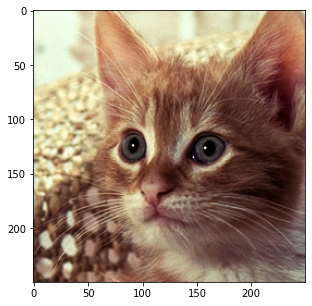

In [18]:
left = 150
right = 400
crop_horizontal = crop_top[:, left: right, :]
plt.figure(figsize=(5, 5))
plt.imshow(crop_horizontal)
plt.show()

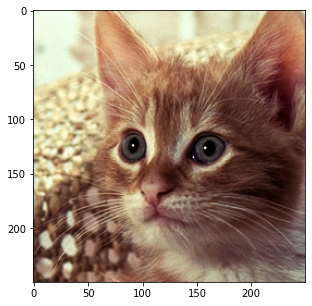

In [19]:
# Crop using PILLOW
image = Image.open('cat.png')
crop_image = image.crop((left, upper, right, lower))
plt.figure(figsize=(5, 5))
plt.imshow(crop_image)
plt.show()

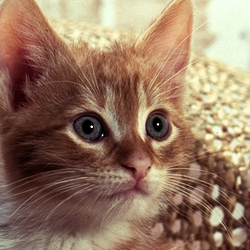

In [20]:
# Flip the new image
crop_image = crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

# Changing specific Image Pixels

In [21]:
# Set all green and blue channel to zero
array_sq = np.copy(array)
array_sq[upper: lower, left: right, 1:2] = 0

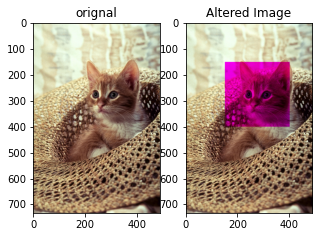

In [22]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(array_sq)
plt.title("Altered Image")
plt.show()

In [23]:
# It can be done using PIL also
from PIL import ImageDraw

In [24]:
image_draw = image.copy()

In [25]:
image_fn = ImageDraw.Draw(im=image_draw)

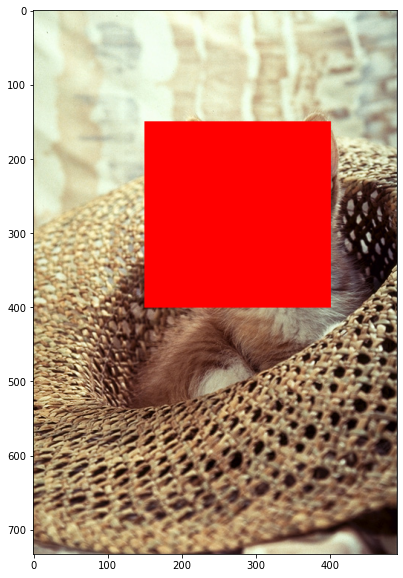

In [26]:
# Draw the rectangle
shape = [left, upper, right, lower]
image_fn.rectangle(xy=shape, fill='red')
plt.figure(figsize=(10, 10))
plt.imshow(image_draw)
plt.show()

## Draw text on image


In [27]:
from PIL import ImageFont

In [28]:
image_fn.text(xy=(0,0), text='box', fill=(0,0,0))

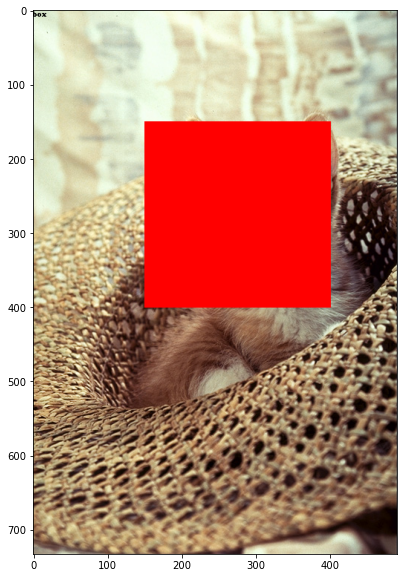

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

## Paste one image over another

In [30]:
image_lenna = Image.open('lenna.png')
array_lenna = np.array(image_lenna)

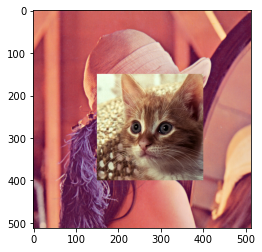

In [31]:
# Reassign pixel values
array_lenna[upper:lower, left:right,:] = array[upper:lower, left:right, :]
plt.imshow(array_lenna)
plt.show()

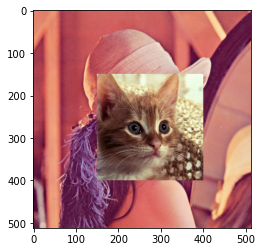

In [32]:
# Using paste method
image_lenna.paste(crop_image, box=(left,upper))
plt.imshow(image_lenna)
plt.show()

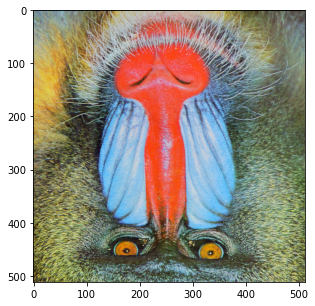

In [33]:
baboon = Image.open('baboon.png')

from PIL import ImageOps
im_flip = ImageOps.flip(baboon)
plt.figure(figsize=(5, 5))
plt.imshow(im_flip)
plt.show()

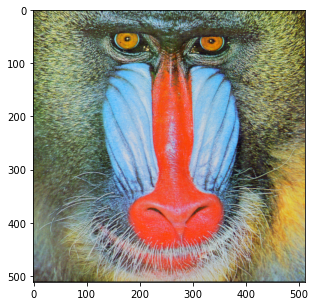

In [34]:
im_mirror = ImageOps.mirror(baboon)
plt.figure(figsize=(5, 5))
plt.imshow(im_mirror)
plt.show()